## Project 1 - Wholesale Customer analysis ##

In [69]:
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pylab
import math
import os
import scipy.stats as stats
from pandas.plotting import scatter_matrix
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro

In [70]:
wc_df = pd.read_csv("D:\\my files\\project SMDM\\Wholesale+Customers+Data.csv")

In [71]:
wc_df.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [72]:
wc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 27.6+ KB


In [73]:
wc_drop_df = copy.deepcopy(wc_df)

In [74]:
del wc_drop_df['Buyer/Spender']

In [75]:
wc_drop_df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,Retail,Other,12669,9656,7561,214,2674,1338
1,Retail,Other,7057,9810,9568,1762,3293,1776
2,Retail,Other,6353,8808,7684,2405,3516,7844
3,Hotel,Other,13265,1196,4221,6404,507,1788
4,Retail,Other,22615,5410,7198,3915,1777,5185


In [76]:
wc_drop_df['Region'].value_counts()

Other     316
Lisbon     77
Oporto     47
Name: Region, dtype: int64

In [77]:
wc_drop_df['Channel'].value_counts()

Hotel     298
Retail    142
Name: Channel, dtype: int64

## 1.1 Use methods of descriptive statistics to summarize data. Which Region and which Channel spent the most? Which Region and which Channel spent the least?

In [78]:
print('Descriptive Statastics Data with Channel & Retail:')
wc_drop_df.describe(include='all').T

Descriptive Statastics Data with Channel & Retail:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Channel,440,2,Hotel,298,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,440,3,Other,316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fresh,440,NaN,NaN,NaN,12000.3,12647.3,3,3127.75,8504,16933.8,112151
Milk,440,NaN,NaN,NaN,5796.27,7380.38,55,1533,3627,7190.25,73498
Grocery,440,NaN,NaN,NaN,7951.28,9503.16,3,2153,4755.5,10655.8,92780
Frozen,440,NaN,NaN,NaN,3071.93,4854.67,25,742.25,1526,3554.25,60869
Detergents_Paper,440,NaN,NaN,NaN,2881.49,4767.85,3,256.75,816.5,3922,40827
Delicatessen,440,NaN,NaN,NaN,1524.87,2820.11,3,408.25,965.5,1820.25,47943


In [79]:
print('Descriptive Statastics Data:')
wc_drop_df.describe().T

Descriptive Statastics Data:


,count,mean,std,min,25%,50%,75%,max
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [80]:
wc_spending_df = copy.deepcopy(wc_drop_df)
wc_spending_df['Spending'] =wc_drop_df['Fresh']+wc_drop_df['Milk']+wc_drop_df['Grocery']+wc_drop_df['Frozen']+wc_drop_df['Detergents_Paper']+wc_drop_df['Delicatessen']
wc_spending_df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Spending
0,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,Retail,Other,22615,5410,7198,3915,1777,5185,46100


### 1.1.1 Which Region and which Channel spent the most?

In [81]:
regiondf = wc_spending_df.groupby('Region')['Spending'].sum()
print(regiondf)
print()
channeldf = wc_spending_df.groupby('Channel')['Spending'].sum()
print(channeldf)

Region
Lisbon     2386813
Oporto     1555088
Other     10677599
Name: Spending, dtype: int64

Channel
Hotel     7999569
Retail    6619931
Name: Spending, dtype: int64


- Highest spend in the Channel is from Hotel = 5742077$

- Highest spend in the Region is from other = 10677599$

### 1.1.2 Which Region and which Channel spent the least?

In [82]:
region_channel_df = wc_spending_df.groupby(['Region','Channel'])['Spending'].sum()
print(region_channel_df)

Region  Channel
Lisbon  Hotel      1538342
        Retail      848471
Oporto  Hotel       719150
        Retail      835938
Other   Hotel      5742077
        Retail     4935522
Name: Spending, dtype: int64


- lowest spend in the Region/Channel is from Oporto/Hotel = 719150$

## 1.2 There are 6 different varieties of items that are considered. Describe and comment/explain all the varieties across Region and Channel? Provide a detailed justification for your answer.

In [83]:
data1 = wc_drop_df.drop(columns=['Region'])
mean1 = data1.groupby('Channel').mean()
mean1.round()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Channel,,,,,,
Hotel,13476.0,3452.0,3962.0,3748.0,791.0,1416.0
Retail,8904.0,10716.0,16323.0,1653.0,7270.0,1753.0


In [84]:
data2 = wc_drop_df.drop(columns=['Channel'])
mean2 = data2.groupby('Region').mean()
mean2.round()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Region,,,,,,
Lisbon,11102.0,5486.0,7403.0,3000.0,2651.0,1355.0
Oporto,9888.0,5088.0,9219.0,4045.0,3687.0,1160.0
Other,12533.0,5977.0,7896.0,2945.0,2818.0,1621.0


<AxesSubplot:xlabel='Region', ylabel='Delicatessen'>

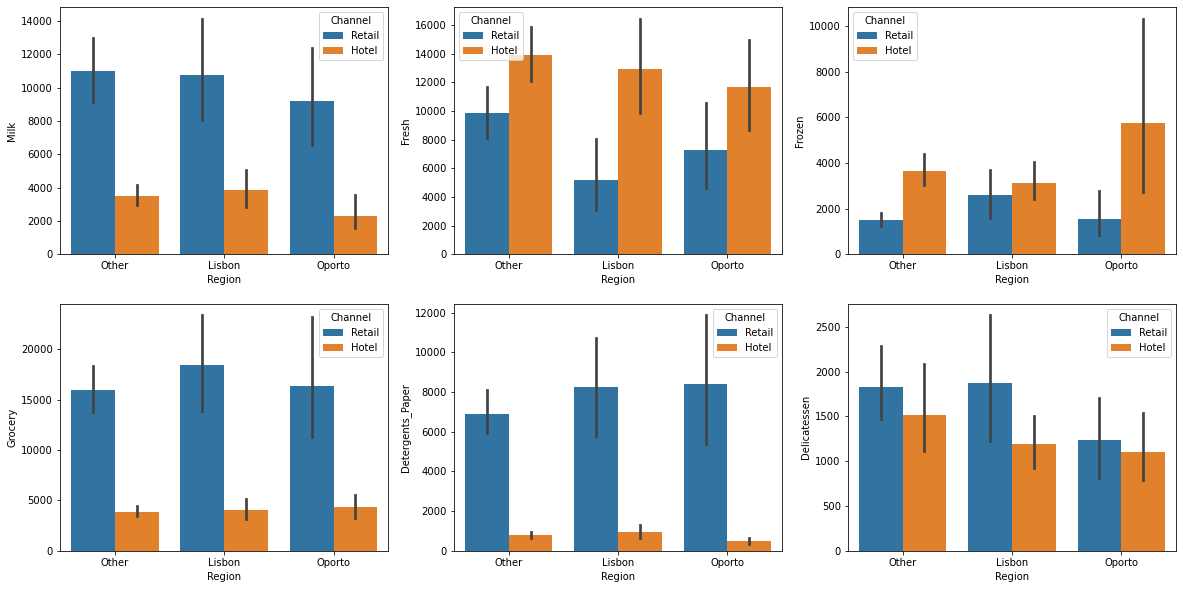

In [85]:
fig = plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
sns.barplot(x=wc_drop_df['Region'],y= wc_drop_df['Milk'], hue=wc_drop_df['Channel'])
plt.subplot(2,3,2)
sns.barplot(x=wc_drop_df['Region'],y= wc_drop_df['Fresh'], hue=wc_drop_df['Channel'])
plt.subplot(2,3,3)
sns.barplot(x=wc_drop_df['Region'],y= wc_drop_df['Frozen'], hue=wc_drop_df['Channel'])
plt.subplot(2,3,4)
sns.barplot(x=wc_drop_df['Region'],y= wc_drop_df['Grocery'], hue=wc_drop_df['Channel'])
plt.subplot(2,3,5)
sns.barplot(x=wc_drop_df['Region'],y= wc_drop_df['Detergents_Paper'], hue=wc_drop_df['Channel'])
plt.subplot(2,3,6)
sns.barplot(x=wc_drop_df['Region'],y= wc_drop_df['Delicatessen'], hue=wc_drop_df['Channel'])

## 1.3 On the basis of a descriptive measure of variability, which item shows the most inconsistent behaviour? Which items show the least inconsistent behaviour?

### Standard Deviations


In [86]:
Sd_items = wc_drop_df.std()
Sd_items.round()

Fresh               12647.0
Milk                 7380.0
Grocery              9503.0
Frozen               4855.0
Detergents_Paper     4768.0
Delicatessen         2820.0
dtype: float64

### Coefficient of variance

In [87]:
cv_fresh = np.std(wc_drop_df['Fresh']) / np.mean(wc_drop_df['Fresh'])
print('Covariance for Fresh is %1f' % cv_fresh)

Covariance for Fresh is 1.052720


In [88]:
cv_milk = np.std(wc_drop_df['Milk']) / np.mean(wc_drop_df['Milk'])
print('Covariance for milk is %1f' % cv_milk)

Covariance for milk is 1.271851


In [89]:
cv_grocery = np.std(wc_drop_df['Grocery']) / np.mean(wc_drop_df['Grocery'])
print('Covariance for Grocery is %1f' % cv_grocery)

Covariance for Grocery is 1.193815


In [90]:
cv_frozen = np.std(wc_drop_df['Frozen']) / np.mean(wc_drop_df['Frozen'])
print('Covariance for Frozen is %1f' % cv_frozen)

Covariance for Frozen is 1.578536


In [91]:
cv_detergents_paper = np.std(wc_drop_df['Detergents_Paper']) / np.mean(wc_drop_df['Detergents_Paper'])
print('Covariance for Detergents_Paper is %1f' % cv_detergents_paper)

Covariance for Detergents_Paper is 1.652766


In [92]:
cv_delicatessen = np.std(wc_drop_df['Delicatessen']) / np.mean(wc_drop_df['Delicatessen'])
print('Covariance for Delicatessen is %1f' % cv_delicatessen)

Covariance for Delicatessen is 1.847304


In [93]:
variance_items = wc_drop_df.var()
variance_items.round()

Fresh               159954927.0
Milk                 54469967.0
Grocery              90310104.0
Frozen               23567853.0
Detergents_Paper     22732436.0
Delicatessen          7952997.0
dtype: float64

## 1.4 Are there any outliers in the data? Back up your answer with a suitable plot/technique with the help of detailed comments.

<AxesSubplot:>

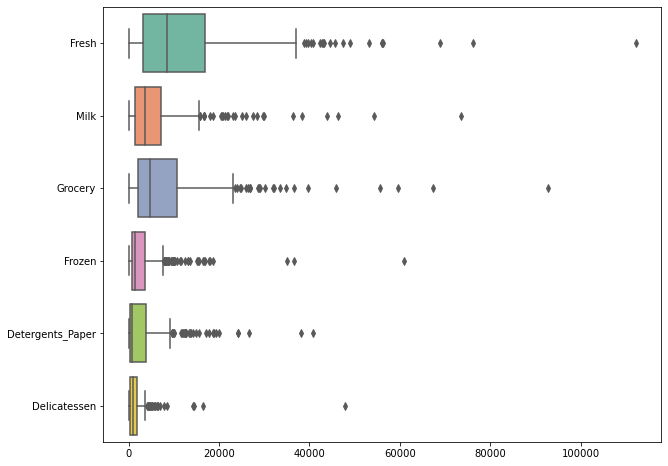

In [94]:
plt.figure(figsize=(10,8))
sns.boxplot(data=wc_drop_df, orient="h", palette="Set2")

### Yes there are outliers in all the items across the product range
###### List of outliers
- Fresh - 112151
- Milk -  73498 
- Grocery - 92780
- Frozen - 60869
- Detergents_Paper - 40827  
- Delicatessen - 47943


<AxesSubplot:>

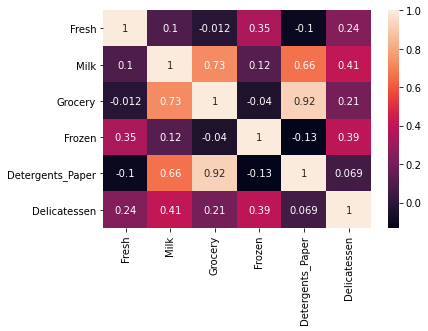

In [95]:
sns.heatmap(wc_drop_df.corr(),annot=True)

all produts are corelate woth each other

# Project 2 - Student Survay # 

In [96]:
df = pd.read_csv("D:\\my files\\project SMDM\\Survey-1.csv")

df.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 62 non-null     int64  
 1   Gender             62 non-null     object 
 2   Age                62 non-null     int64  
 3   Class              62 non-null     object 
 4   Major              62 non-null     object 
 5   Grad Intention     62 non-null     object 
 6   GPA                62 non-null     float64
 7   Employment         62 non-null     object 
 8   Salary             62 non-null     float64
 9   Social Networking  62 non-null     int64  
 10  Satisfaction       62 non-null     int64  
 11  Spending           62 non-null     int64  
 12  Computer           62 non-null     object 
 13  Text Messages      62 non-null     int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 5.4+ KB


## 2.1 For this data, construct the following contingency tables (Keep Gender as row variable)

### Contigency tables

### 2.1.1. Gender and Major

In [98]:
df1 = pd.crosstab(index=df["Gender"],columns=df["Major"])

df1

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


### 2.1.2. Gender and Grad Intention

In [99]:
df2 = pd.crosstab(index=df["Gender"],columns=df["Grad Intention"])

df2

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


### 2.1.3. Gender and Employment

In [100]:
df3 = pd.crosstab(index=df["Gender"],columns=df["Employment"])

df3

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


### 2.1.4. Gender and Computer

In [101]:
df4 = pd.crosstab(index=df["Gender"],columns=df["Computer"])

df4

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


## 2.2. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question

### 2.2.1. What is the probability that a randomly selected CMSU student will be male?

In [102]:
df.columns

Index(['ID', 'Gender', 'Age', 'Class', 'Major', 'Grad Intention', 'GPA',
       'Employment', 'Salary', 'Social Networking', 'Satisfaction', 'Spending',
       'Computer', 'Text Messages'],
      dtype='object')

In [103]:
males = df[(df['Gender']=='Male')]
males.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100
11,12,Male,21,Senior,Undecided,No,3.5,Full-Time,37.0,2,3,500,Laptop,100


In [104]:
males.count()

ID                   29
Gender               29
Age                  29
Class                29
Major                29
Grad Intention       29
GPA                  29
Employment           29
Salary               29
Social Networking    29
Satisfaction         29
Spending             29
Computer             29
Text Messages        29
dtype: int64

In [105]:
total_number_of_males=29     
total_number_of_Students=62
Prob = round(total_number_of_males/total_number_of_Students,6)*100
print('Probability chances of males are rendomly selected. is %1.1f' % Prob +'%')

Probability chances of males are rendomly selected. is 46.8%


-	probability = total number of males/ total number of entries
-	total number of males = 29
-	total number of entries = 62
-	probability of males = 29/62
-	46.8% chances of males are probably randomly selected.


### 2.2.2. What is the probability that a randomly selected CMSU student will be female?

In [106]:
females = df[(df['Gender']=='Female')]
females.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
5,6,Female,22,Senior,Economics/Finance,Undecided,2.3,Unemployed,78.0,3,2,700,Laptop,30
6,7,Female,21,Junior,Other,Undecided,3.0,Part-Time,50.0,1,3,500,Laptop,50
7,8,Female,22,Senior,Other,Undecided,3.1,Full-Time,80.0,1,2,200,Tablet,300
8,9,Female,20,Junior,Management,Yes,3.6,Unemployed,30.0,0,4,500,Laptop,400


In [107]:
females.count()

ID                   33
Gender               33
Age                  33
Class                33
Major                33
Grad Intention       33
GPA                  33
Employment           33
Salary               33
Social Networking    33
Satisfaction         33
Spending             33
Computer             33
Text Messages        33
dtype: int64

In [108]:
total_number_of_females=33     
total_number_of_Students=62
Prob = round(total_number_of_females/total_number_of_Students,6)*100
print('Probability chances of females are rendomly selected. is %1.1f' % Prob +'%')

Probability chances of females are rendomly selected. is 53.2%


-	probability = total number of females/ total number of Students
-	total number of females = 33
-	total number of Students = 62
-	probability of males = 33/62
-	53.2% chances of females are probably randomly selected.


## 2.3 Assume that the sample is representative of the population of CMSU. Based on thedata, answer the following question:

### 2.3.1 Find the conditional probability of different majors among the male students in CMSU.

In [109]:
df1

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


- As we show above number of total counts for male are 29

In [110]:
male_in_accounting=4
Total_male=29
Prob = round(male_in_accounting/Total_male,6)*100
print('Probability of Males opting for Accounting is %1.1f' % Prob +'%')

male_in_CIS=1
Total_male=29
Prob = round(male_in_CIS/Total_male,6)*100
print('Probability of Males opting for CIS is %1.1f' % Prob +'%')

male_in_Economics_Finance=4
Total_male=29
Prob = round(male_in_Economics_Finance/Total_male,6)*100
print('Probability of Males opting for Economics/Finance is %1.1f' % Prob +'%')

male_in_International_Business=2
Total_male=29
Prob = round(male_in_International_Business/Total_male,6)*100
print('Probability of Males opting for International Business/Finance is %1.1f' % Prob +'%')

male_in_Management=6
Total_male=29
Prob = round(male_in_Management/Total_male,6)*100
print('Probability of Males opting for Management is %1.1f' % Prob +'%')

male_in_Other=4
Total_male=29
Prob = round(male_in_Other/Total_male,6)*100
print('Probability of Males opting for Other is %1.1f' % Prob +'%')

male_in_Retailing_Marketing=5
Total_male=29
Prob = round(male_in_Retailing_Marketing/Total_male,6)*100
print('Probability of Males opting for Retailing_Marketing is %1.1f' % Prob +'%')

male_in_Undecided=3
Total_male=29
Prob = round(male_in_Undecided/Total_male,6)*100
print('Probability of Males opting for Undecided is %1.1f' % Prob +'%')




Probability of Males opting for Accounting is 13.8%
Probability of Males opting for CIS is 3.4%
Probability of Males opting for Economics/Finance is 13.8%
Probability of Males opting for International Business/Finance is 6.9%
Probability of Males opting for Management is 20.7%
Probability of Males opting for Other is 13.8%
Probability of Males opting for Retailing_Marketing is 17.2%
Probability of Males opting for Undecided is 10.3%


### 2.3.2 Find the conditional probability of different majors among the female students in CMSU.

- As we show above number of total counts for female are 33

In [111]:
female_in_accounting=3     
Total_female=33
Prob = round(female_in_accounting/Total_female,6)*100
print('Probability of females opting for Accounting is %1.1f' % Prob +'%')

female_in_CIS=3
Total_female=33
Prob = round(female_in_CIS/Total_female,6)*100
print('Probability of females opting for CIS is %1.1f' % Prob +'%')

female_in_Economics_Finance=7
Total_female=33
Prob = round(female_in_Economics_Finance/Total_female,6)*100
print('Probability of females opting for Economics/Finance is %1.1f' % Prob +'%')

female_in_International_Business=4
Total_female=33
Prob = round(female_in_International_Business/Total_female,6)*100
print('Probability of females opting for International Business/Finance is %1.1f' % Prob +'%')

female_in_Management=4
Total_female=33
Prob = round(female_in_Management/Total_female,6)*100
print('Probability of females opting for Management is %1.1f' % Prob +'%')

female_in_Other=3
Total_female=33
Prob = round(female_in_Other/Total_female,6)*100
print('Probability of females opting for Other is %1.1f' % Prob +'%')

female_in_Retailing_Marketing=9
Total_female=33
Prob = round(female_in_Retailing_Marketing/Total_female,6)*100
print('Probability of females opting for Retailing_Marketing is %1.1f' % Prob +'%')

female_in_Undecided=0
Total_female=33
Prob = round(female_in_Undecided/Total_female,6)*100
print('Probability of females opting for Undecided is %1.1f' % Prob +'%')




Probability of females opting for Accounting is 9.1%
Probability of females opting for CIS is 9.1%
Probability of females opting for Economics/Finance is 21.2%
Probability of females opting for International Business/Finance is 12.1%
Probability of females opting for Management is 12.1%
Probability of females opting for Other is 9.1%
Probability of females opting for Retailing_Marketing is 27.3%
Probability of females opting for Undecided is 0.0%


## 2.4. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

### 2.4.1. Find the probability That a randomly chosen student is a male and intends to graduate.

In [112]:
df.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


- as we see in table there is 17 males are intends to graduate
- total number of males are 29

In [113]:
male_are_graduate =17
Total_male=29
Prob = round(male_are_graduate /Total_male,6)*100
print('Probability of males are graduate is %1.1f' % Prob +'%')

Probability of males are graduate is 58.6%


### 2.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop. 

In [114]:
df4

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


- as we see in table there is 4 females dosent have Laptop
- total number of females are 33

In [115]:
female_Have_no_Laptop=4
Total_female=33
pro= round(female_Have_no_Laptop /Total_female,6)*100
print('Probability of female students does not have laptop is 12.12%')

Probability of female students does not have laptop is 12.12%


## 2.5. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

### 2.5.1. Find the probability that a randomly chosen student is either a male or has full-time employment?

In [116]:
df3

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


- Total number of students are 62
- Total number of male students are 29
- As show in data set 7 males have full time jobs

In [117]:
Total_male =29
Total_Student=62
Prob = round(Total_male /Total_Student,6)*100
print('Probability of total number of student has a male is %1.1f' % Prob +'%')

Probability of total number of student has a male is 46.8%


In [118]:
full_time_job =7
Total_Student=62
Prob = round(full_time_job /Total_Student,6)*100
print('Probability of total number of student has a full time job is %1.1f' % Prob +'%')

Probability of total number of student has a full time job is 11.3%


### 2.5.2. Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.

In [119]:
df1

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


- as we show in data set there is 8 female have international business or management

In [120]:
female_business_or_management =8
Total_female=33
Prob = round(female_business_or_management /Total_female,6)*100
print('female student is randomly chosen and she is majoring in international business or management is %1.1f' % Prob +'%')

female student is randomly chosen and she is majoring in international business or management is 24.2%


## 2.6.  Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think the graduate intention and being female are independent events?

In [121]:
data = pd.crosstab(df["Gender"],df["Grad Intention"])
data

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


In [122]:
data = data.drop(columns='Undecided')
data

Grad Intention,No,Yes
Gender,,
Female,9,11
Male,3,17


In [123]:
new_data = {'Gender': ['Female','Male','ToTal'], 'No': [9, 3,12],'yes': [11,7,28]}
ndf = pd.DataFrame(new_data)
total = [20,20,40]
ndf['Total'] = total
ndf

,Gender,No,yes,Total
0,Female,9,11,20
1,Male,3,7,20
2,ToTal,12,28,40


### Is the graduate intention and being female are independent events?


- The Probability that a randomly selected student ‘being female.’
- The Probability that a randomly selected student the graduate intention and being female.
- P (Grad Intention Yes) = 28/40 = 0.7
- P (Grad Intention Yes | female) = 11 / 20 = 0.55
- These probabilities are not equal. This suggests that the two events are independent.


## 2.7. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages.

### 2.7.1. If a student is chosen randomly, what is the probability that his/her GPA is less than 3?

In [124]:
df12 = pd.crosstab(index=df["Gender"],columns=df["GPA"])

df12

GPA,2.3,2.4,2.5,2.6,2.8,2.9,3.0,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9
Gender,,,,,,,,,,,,,,,,
Female,1,1,2,0,1,3,5,2,4,3,2,4,1,2,1,1
Male,0,0,4,2,2,1,2,5,2,2,5,2,2,0,0,0


In [125]:
less_then_3 =17
Total_Student=62
Prob = round(less_then_3 /Total_Student,6)*100
print('Probability of less than 3 GPA his/her students is %1.1f' % Prob +'%')

Probability of less than 3 GPA his/her students is 27.4%


### 2.7.2. Find the conditional probability that a randomly selected male earns 50 or more. Find the conditional probability that a randomly selected female earns 50 or more.

In [126]:
df3 = pd.crosstab(index=df["Gender"],columns=df["Employment"])

df3

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


- As per data set 6-Females and 3-Males are unemployed

In [127]:
df_1 = pd.crosstab(index=df["Gender"],columns=df["Salary"])

df_1

Salary,25.0,30.0,35.0,37.0,37.5,40.0,42.0,45.0,47.0,47.5,50.0,52.0,54.0,55.0,60.0,65.0,70.0,78.0,80.0
Gender,,,,,,,,,,,,,,,,,,,
Female,0,5,1,0,1,5,1,1,0,1,5,0,0,5,5,0,1,1,1
Male,1,0,1,1,0,7,0,4,1,0,4,1,1,3,3,1,0,0,1


In [128]:
earn_50_more =19
Total_Student=59
Prob = round(earn_50_more /Total_Student,6)*100
print('Probability of who earn more than or equal to 50 male students is %1.1f' % Prob +'%')

Probability of who earn more than or equal to 50 male students is 32.2%


In [129]:
femearn_50_more =20
Total_Student=56
Prob = round(femearn_50_more /Total_Student,6)*100
print('Probability of who earn more than or equal to 50 female students is %1.1f' % Prob +'%')

Probability of who earn more than or equal to 50 female students is 35.7%


### 2.8. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages. For each of them comment whether they follow a normal distribution. Write a note summarizing your conclusions for this whole Problem 2.

<AxesSubplot:xlabel='Text Messages', ylabel='Count'>

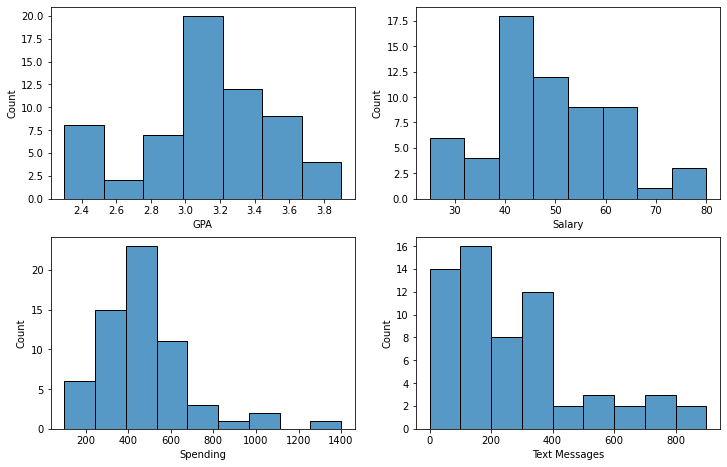

In [130]:
plt.figure(figsize= (12,12))
plt.subplot(3,2,1)
sns.histplot(df["GPA"])
plt.subplot(3,2,2)
sns.histplot(df["Salary"])
plt.subplot(3,2,3)
sns.histplot(df["Spending"])
plt.subplot(3,2,4)
sns.histplot(df["Text Messages"])

- Shapiro Result (statistic=0.953252375125885, p-value=0.09815297275781631)
- Shapiro Result (statistic=0.9689891934394836, p-value=0.33416980504989624)
- Shapiro Result (statistic=0.8724251985549927, p-value=0.00033097428968176246)
- Shapiro Result (statistic=0.8824034929275513, p-value=0.0006114590214565396)


# Project 3

## 3.1 Do you think there is evidence that means moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps.

In [131]:
Project_3 = pd.read_csv("D:\\my files\\project SMDM\\A+&+B+shingles.csv")
Project_3.head()

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


In [132]:
Project_3_A=[0.44,0.61,0.47,0.3,0.15,0.24,0.16,0.2,0.2,0.2,0.26,0.14,0.33,0.13,0.72,0.51,0.28,0.39,0.39,0.25,0.16,0.2,
     0.22,0.42,0.24,0.21,0.49,0.34,0.36,0.29,0.27,0.4,0.29,0.43,0.34,0.37]

In [133]:
Project_3_B=[0.14,0.15,0.31,0.16,0.37,0.18,0.42,0.58,0.25,0.41,0.17,0.13,0.23,0.11,0.1,0.19,0.22,0.44,0.11,0.11,
             0.31,0.43,0.26,0.18,0.44,0.43,0.16,0.52,0.36,0.22,0.39]

In [134]:
from scipy.stats import  ttest_1samp
t_statistic, p_value =  ttest_1samp(Project_3_A,0.35)
print('t_statistic: {0} & p_value: {1} '.format(t_statistic, p_value/2))

t_statistic: -1.4735046253382782 & p_value: 0.07477633144907513 


In [135]:
t_statistic, p_value =  ttest_1samp(Project_3_B,0.35)
print('t_statistic: {0} & p_value: {1} '.format(t_statistic, p_value/2))

t_statistic: -3.1003313069986995 & p_value: 0.0020904774003191813 


### 3.2 Do you think that the population mean for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

###### As show in que.
- H0 : μ(A)=μ(B)
- Ha : μ(A)=μ(B)
- α = 0.05

In [136]:
t_statistic,p_value=stats.ttest_ind(Project_3_A,Project_3_B,equal_var=True ,nan_policy='omit')
print("t_statistic={} & pvalue={}".format(round(t_statistic,3),round(p_value,3)))

t_statistic=1.29 & pvalue=0.202


## Thank you ##